#### Week - 5. Assignment (Section A)

Here, the focus is the quantum statistical mechnaics, the harmonic and anharonic oscillator, it other words: a particle in a harmonic or an anharmonic potential

A. In this section, we consider a particle in a harmonic potential $V(x) = x^2 / 2$ at very low temperature, that is, in the limit T -> 0

**Question A1.** The probability $\pi(x)$ of a classical particle in a harmonic potential at temperature T is given by, <br>
$\pi(x) \sim \exp(-\beta x^2/2)$, where $\beta = 1/T$. <br>
Explain in one sentence why this implies that in the limit of zero temperature, the classical particle is "localized" at position x=0, that is, why this means that at T=0, the classical particle sits at the minimum of the potential and is immobile.

**Answer** At $T\rightarrow 0$, the $\pi(x)\rightarrow 0$, which implies the system is in absolute zero tempertaure wherein all the possibles states are prempted and the system remains in the ground state.  Finally, the particle becomes immobiles and rest at the minima of the harmonic potential well.

**A1 (continued)**

The ground-state wave function of a quantum particle in a harmonic trap
 is equal to $\psi_0 (x) = (1/ \pi^{(1/4)}) exp( - x^2 / 2)$. <br>
 
 In the limit $T\rightarrow 0$, the probability $\pi(x)$ of a quantum particle to be at x is equal
 to the square of the ground state wave function, $\psi_0(x))^2$. Familiarize yourself with the Markov-chain Monte Carlo algorithm for a particle in a Gaussian potential, using the Metropolis algorithm:  namely the program markov_gauss.py (this program was discussed in last week's Tutorial, Tutorial 4). Modify this Metropolis algorithm so that it 
samples positions x according to the probability $\pi(x) = \psi_0(x)^2$. You should use a function for the square of the wave function (def psi_0_sq(x): ...). Furthermore, the program should output the normed histogram of the particle positions (use pylab.hist() with "normed=True") and compare to the function $\psi_0^2(x)$. Upload this program.

NB: Note that at zero temperature ($\beta \rightarrow \infty$), the diagonal density matrix $\rho(x, x, \beta \rightarrow \infty) = \psi_0(x)^2$.


In [1]:
import random, math

def psi_0_sq_x(x): # define a function for psi_0_x
    psi_0 = (1/(math.pi**(1/4)))*math.exp(-(x**2)/2.0)
    return psi_0**2  

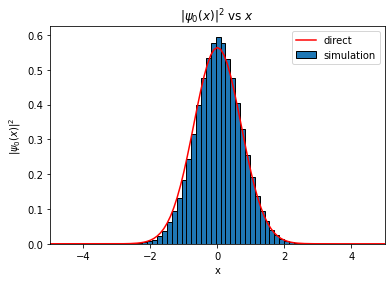

In [2]:
import matplotlib.pyplot as plt
import pylab

x = 0.0
delta = 0.1
y = []
for k in range(1000000):
    x_new = x + random.uniform(-delta, delta)
    if random.uniform(0.0, 1.0) < psi_0_sq_x(x_new)/psi_0_sq_x(x): #Metropolis acceptance
        x = x_new 
        y.append(x)
        
Psi2 = [] #initialize the vector Psi
grid_x = [i * 0.1 for i in range(-100, 100)]
psi2 = {}
for x in grid_x:
    psi2[x] = [psi_0_sq_x(x)]# ground state
    Psi2.append(psi2[x])
    
    
pylab.hist(y,40,density = 'True', stacked = 'True', ec = 'black')#Generating the normed histogram
pylab.plot(grid_x, Psi2, color = "red")
plt.xlabel('x')
plt.ylabel('$|\psi_0 (x)|^2$')
pylab.xlim(-5.0, 5.0)
pylab.title('$|\psi_0 (x)|^2$ vs $x$')
pylab.legend(['direct','simulation'])
pylab.savefig('Probablity_density_ground_state.png')

**Question A2** In this Section, you consider the **quantum particle in the harmonic potential**, at **finite temperature**. Its probability to be in state 'n' and at position 'x' is given by

$\pi(n, x)  =  \psi_n(x)^2  exp^{-\beta E_n}$

Here, the energies $E_n = n+ 1/2$, and the wave functions $\psi_n(x)$ are known through the recursion discussed in harmonic_wavefunction.py (as discussed in lecture 5). You do not need to understand why this recursion is correct, but you can check that this is ok in harmonic_wavefunction_check.py (see Lecture 5).<br>
The probability $\pi(n, x)$ expresses two fundamental aspects:

- The particle is in state n with the statistical Boltzmann probability proportional to $exp(-\beta * n)$  (because $E_n = n + 1/2$, and because the integral of $\psi_n(x)^2$ is equal to one).

- While in state $n$, the particle is at position $x$ with the quantum probability $\psi_n(x)^2$.

Modify your program from **Section A1** to simulate the particle at finite temperature $T = \frac{1}{\beta}$. To do so,

- modify the program from **Section A1**, in order to accept the move  from $(n, x)$ to $(n, x')$  with the Metropolis acceptance rate $min (1, (\psi_n(x')/\psi_n(x))^2 )$, x' should be close to x, as in **Section A1**.

- modify the program further, and add a move which keeps x fixed and changes n to $m = n \pm 1$. Such a move from (n, x) to $(m = n \pm 1, x)$  should be accepted with the $p=min(1, (\psi_m(x)/\psi_n(x))^2 * exp(-\beta*(E_m-E_n))$.  Moves to m < 0 must be proposed (piles of pebbles!!), but they should always be rejected.

In writing this program,  you may alternate the moves (attempt (n, x) to (n, x') then attempt (n, x) to  $(m = n \pm 1, x)$ etc). Furthermore, use the following rewriting of the recursion for the harmonic wave functions (from harmonic_wavefunction.py see lecture 5), which returns (psi_n(x))^2, and do not worry about the fact that it is slow:

**def psi_n_square(x, n):<br>
    if n == -1:<br>
        return 0.0<br>
    else:<br>
        psi = [math.exp(-x ** 2 / 2.0) / math.pi ** 0.25]<br>
        psi.append(math.sqrt(2.0) * x * psi[0])<br>
        for k in range(2, n + 1):<br>
            psi.append(math.sqrt(2.0 / k) * x * psi[k - 1] -<br>
                       math.sqrt((k - 1.0) / k) * psi[k - 2])<br>
        return psi[n] ** 2<br>**
        
(Notice that this function returns 0 when  n=-1. This is useful to simplify the acceptance probability for the n-changing move, since we want to reject all moves that go from n=0 to n=-1).

When done:

- Run this program, and determine the normed histograms of the particle positions at inverse temperatures $\beta = 0.2$, $\beta=1$, and $\beta=5$ (use pylab.hist with normed=True).

- Compare to the exact probability distribution $\pi_{quant}(x) = \rho(x,x,\beta)/Z$ given by the expression $\pi_{quant}(x) = \sqrt{\tanh(\beta/2) / \pi} exp[ - x^2 * \tanh(\beta/2)]$.Make sure to include this function on the same graph as the histogram. 

- Compare to the exact classical probability distribution $\sim exp[ - \beta V(x)]$  with $V = x^2/2$, properly normalized:<br> 

$\pi_{class}(x) = \sqrt{\beta/ (2 \pi)} exp(- \beta x^2/ 2)$.



In [3]:
import random, math
import matplotlib.pyplot as plt
import pylab

#Define the functional form for the probablity distribution at any arbitary temperature 
def psi_n_square(x, n):
    if n == -1:
        return 0.0
    else:
        psi = [math.exp(-x ** 2 / 2.0) / math.pi ** 0.25]
        psi.append(math.sqrt(2.0) * x * psi[0])
        for k in range(2, n + 1):
            psi.append(math.sqrt(2.0 / k) * x * psi[k - 1] -
                       math.sqrt((k - 1.0) / k) * psi[k - 2])
        return psi[n] ** 2
# An exact form of normalized probablility density in quantum and classical state
def pi_quant(x,beta):
    return (math.sqrt(math.tanh(beta/2)/math.pi)*math.exp(-x**2 /math.tanh(beta/2)))

def pi_class(x,beta):
    return (math.sqrt(beta/(2*math.pi))*math.exp(-beta*(x**2)/2))


**A2.(a) Histogram plot for the normalized probability ditribution at ground State i.e., n = 0**

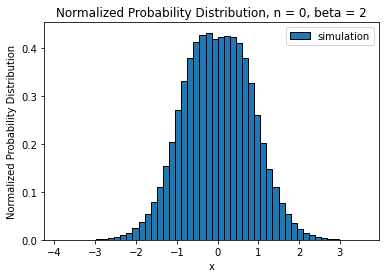

In [4]:
n = 0 #The state (ground state )
E_n = n + 1/2.0 #The energy (ground state energy)
beta = 2 # Inverse temperature

#Metropolis Monte Carlo Simulation
x = 0.0 
delta = 2
y = []
for k in range(1000000):
    x_new = x + random.uniform(-delta, delta)
    if random.uniform(0.0, 1.0) < psi_n_square(x_new,n)/psi_n_square(x,n): #Metropolis acceptance
        x = x_new 
        m = n + random.choice((-1,1)) #random.uniform(-1.0, 1.0)
        E_m = m + 1/2
        if random.uniform(0.0, 1.0) < (psi_n_square(x,m)/psi_n_square(x,n))\
        *math.exp(-beta*(E_m-E_n)): #Metropolis acceptance
            n = m
            E_n = E_m
        y.append(x)

pylab.hist(y,50,density = 'True', stacked = 'True', ec = 'black')#Generating the normed histogram
pylab.legend(['simulation'])
pylab.xlabel('x')
pylab.ylabel('Normalized Probability Distribution')
pylab.title('Normalized Probability Distribution, n = 0, beta = 2')
pylab.savefig('Probablity_density.png')

**A2.(b) Comparision of simulation and exact form for the normalized probability ditribution at ground State i.e., n = 0, beta = 0.2**

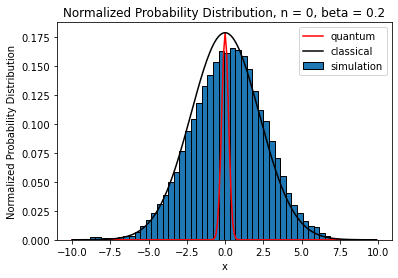

In [5]:
n = 0 #The state (ground state )
E_n = n + 1/2.0 #The energy (ground state energy)
beta = 0.2 # Inverse temperature

#Metropolis Monte Carlo Simulation
x = 0.0 
delta = 0.1
y = []
for k in range(1000000):
    x_new = x + random.uniform(-delta, delta)
    if random.uniform(0.0, 1.0) < psi_n_square(x_new,n)/psi_n_square(x,n): #Metropolis acceptance
        x = x_new 
        m = n + random.choice((-1,1)) #random.uniform(-1.0, 1.0)
        E_m = m + 1/2
        if random.uniform(0.0, 1.0) < (psi_n_square(x,m)/psi_n_square(x,n))\
        *math.exp(-beta*(E_m-E_n)): #Metropolis acceptance
            n = m
            E_n = E_m
        y.append(x)
#Exact form of quantum wavefunction        
Pi_Quant = [] #initialize the vector Psi
grid_x = [i * 0.1 for i in range(-100, 100)]
pi_quant2 = {}
for x in grid_x:
    pi_quant2[x] = [pi_quant(x,beta)]# ground state
    Pi_Quant.append(pi_quant2[x])
#Exact form of classical wavefunction
Pi_Class = [] #initialize the vector Psi
grid_x = [i * 0.1 for i in range(-100, 100)]
pi_class2 = {}
for x in grid_x:
    pi_class2[x] = [pi_class(x,beta)]# ground state
    Pi_Class.append(pi_class2[x])
    
pylab.hist(y,50,density = 'True', stacked = 'True', ec = 'black')#Generating the normed histogram
pylab.plot(grid_x, Pi_Quant, color = 'red')
pylab.plot(grid_x, Pi_Class, color = 'black')
pylab.legend(['quantum', 'classical', 'simulation'])
pylab.xlabel('x')
pylab.ylabel('Normalized Probability Distribution')
pylab.title('Normalized Probability Distribution, n = 0, beta = 0.2')
pylab.savefig('Probablity_density_n_0_beta_0.2.png')

**A2.(c) Comparision of simulation and exact form for the normalized probability ditribution at ground State i.e., n = 0, beta = 1**

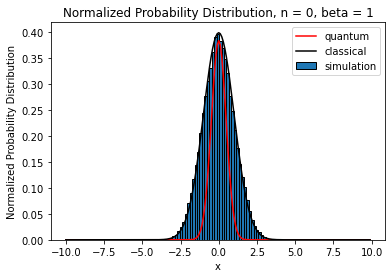

In [6]:
n = 0 #The state (ground state )
E_n = n + 1/2.0 #The energy (ground state energy)
beta = 1# Inverse temperature

#Metropolis Monte Carlo Simulation
x = 0.0 
delta = 0.1
y = []
for k in range(1000000):
    x_new = x + random.uniform(-delta, delta)
    if random.uniform(0.0, 1.0) < psi_n_square(x_new,n)/psi_n_square(x,n): #Metropolis acceptance
        x = x_new 
        m = n + random.choice((-1,1)) #random.uniform(-1.0, 1.0)
        E_m = m + 1/2
        if random.uniform(0.0, 1.0) < (psi_n_square(x,m)/psi_n_square(x,n))\
        *math.exp(-beta*(E_m-E_n)): #Metropolis acceptance
            n = m
            E_n = E_m
        y.append(x)
#Exact form of quantum wavefunction        
Pi_Quant = [] #initialize the vector Psi
grid_x = [i * 0.1 for i in range(-100, 100)]
pi_quant2 = {}
for x in grid_x:
    pi_quant2[x] = [pi_quant(x,beta)]# ground state
    Pi_Quant.append(pi_quant2[x])
#Exact form of classical wavefunction
Pi_Class = [] #initialize the vector Psi
grid_x = [i * 0.1 for i in range(-100, 100)]
pi_class2 = {}
for x in grid_x:
    pi_class2[x] = [pi_class(x,beta)]# ground state
    Pi_Class.append(pi_class2[x])
    
pylab.hist(y,50,density = 'True', stacked = 'True', ec = 'black')#Generating the normed histogram
pylab.plot(grid_x, Pi_Quant, color = 'red')
pylab.plot(grid_x, Pi_Class, color = 'black')
pylab.legend(['quantum', 'classical', 'simulation'])
pylab.xlabel('x')
pylab.ylabel('Normalized Probability Distribution')
pylab.title('Normalized Probability Distribution, n = 0, beta = 1')
pylab.savefig('Probablity_density_n_0_beta_1.png')

**A2.(d) Comparision of simulation and exact form for the normalized probability ditribution at ground State i.e., n = 0, beta = 5**

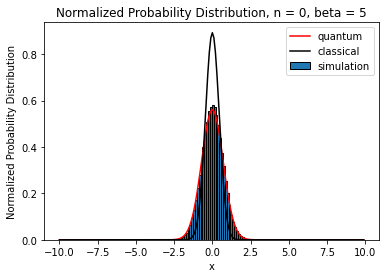

In [7]:
n = 0 #The state (ground state )
E_n = n + 1/2.0 #The energy (ground state energy)
beta = 5# Inverse temperature

#Metropolis Monte Carlo Simulation
x = 0.0 
delta = 0.1
y = []
for k in range(1000000):
    x_new = x + random.uniform(-delta, delta)
    if random.uniform(0.0, 1.0) < psi_n_square(x_new,n)/psi_n_square(x,n): #Metropolis acceptance
        x = x_new 
        m = n + random.choice((-1,1)) #random.uniform(-1.0, 1.0)
        E_m = m + 1/2
        if random.uniform(0.0, 1.0) < (psi_n_square(x,m)/psi_n_square(x,n))\
        *math.exp(-beta*(E_m-E_n)): #Metropolis acceptance
            n = m
            E_n = E_m
        y.append(x)
#Exact form of quantum wavefunction        
Pi_Quant = [] #initialize the vector Psi
grid_x = [i * 0.1 for i in range(-100, 100)]
pi_quant2 = {}
for x in grid_x:
    pi_quant2[x] = [pi_quant(x,beta)]# ground state
    Pi_Quant.append(pi_quant2[x])
#Exact form of classical wavefunction
Pi_Class = [] #initialize the vector Psi
grid_x = [i * 0.1 for i in range(-100, 100)]
pi_class2 = {}
for x in grid_x:
    pi_class2[x] = [pi_class(x,beta)]# ground state
    Pi_Class.append(pi_class2[x])
    
pylab.hist(y,50,density = 'True', stacked = 'True', ec = 'black')#Generating the normed histogram
pylab.plot(grid_x, Pi_Quant, color = 'red')
pylab.plot(grid_x, Pi_Class, color = 'black')
pylab.legend(['quantum', 'classical', 'simulation'])
pylab.xlabel('x')
pylab.ylabel('Normalized Probability Distribution')
pylab.title('Normalized Probability Distribution, n = 0, beta = 5')
pylab.savefig('Probablity_density_n_0_beta_5.png')

#### B. 
In Section **A2** we were able to determine the probability pi(x) of the quantum particle to be at position x, because we had as input **all the wave functions** and **all the energies**.
In this section, you will arrive at the same result (computation of $\pi(x)$), but without using this input. We will do matrix-squaring (Section **B1**) and the path-integral Monte Carlo simulation (Section **B2**)

**B1**(Matrix Squaring)

- Download the program harmonic_matrix_square.py
- Modify your program further so that it output $\pi(x)$ at the final beta onto a file (notice that $\pi(x) = \rho(x, x, \beta)/Z$ with $Z = \int \rho(x,x, \beta) dx$. This can be done by adding the following snippet.

Z = sum(rho[j, j] for j in range(nx + 1)) * dx <br>
pi_of_x = [rho[j, j] / Z for j in range(nx + 1)]<br>
f = open('data_harm_matrixsquaring_beta' + str(beta) + '.dat', 'w')<br>
for j in range(nx + 1):<br>
    f.write(str(x[j]) + ' ' + str(rho[j, j] / Z) + '\n')<br>
f.close()<br>


In [8]:
import math, numpy

# Free off-diagonal density matrix
def rho_free(x, xp, beta):
    return (math.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            math.sqrt(2.0 * math.pi * beta))

# Harmonic density matrix in the Trotter approximation (returns the full matrix)
def rho_harmonic_trotter(grid, beta):
    return numpy.array([[rho_free(x, xp, beta) * \
                         numpy.exp(-0.5 * beta * 0.5 * (x ** 2 + xp ** 2)) \
                         for x in grid] for xp in grid])

x_max = 5.0
nx = 100
dx = 2.0 * x_max / (nx - 1)
x = [i * dx for i in range(-(nx - 1) // 2, nx // 2 + 1)]
beta_tmp = 2.0 ** (-5)                   # initial value of beta (power of 2)
beta     = 2.0 ** 4                      # actual value of beta (power of 2)

rho = rho_harmonic_trotter(x, beta_tmp)  # density matrix at initial beta
while beta_tmp < beta:
    rho = numpy.dot(rho, rho)
    rho *= dx
    beta_tmp *= 2.0
    #print ('beta: %s -> %s' % (beta_tmp / 2.0, beta_tmp))
    Z = sum(rho[j, j] for j in range(nx + 1)) * dx
    pi_of_x = [rho[j, j] / Z for j in range(nx + 1)]
    f = open('data_harm_matrixsquaring_beta' + str(beta) + '.dat', 'w')
    for j in range(nx + 1):
        f.write(str(x[j]) + ' ' + str(rho[j, j] / Z) + '\n')
    f.close()


- Modify it so that it plots the pi(x) at the final beta. In the same plot, show the analytic curve for $\pi(x)$ (the function $\pi_{quant}(x)$, from section A2).


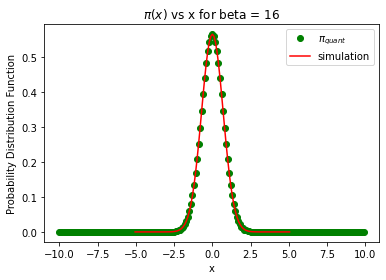

In [9]:
#Exact form of quantum wavefunction        
Pi_Quant = [] #initialize the vector Psi
grid_x = [i * 0.1 for i in range(-100, 100)]
pi_quant2 = {}
beta = 16
for xx in grid_x:
    pi_quant2[xx] = [pi_quant(xx,beta)]# ground state
    Pi_Quant.append(pi_quant2[xx])
pylab.plot(grid_x, Pi_Quant, 'o', color = 'green')
pylab.plot(x, pi_of_x, color = 'red')
pylab.xlabel('x')
pylab.ylabel('Probability Distribution Function')
pylab.title('$\pi(x)$ vs x for beta = 16')
pylab.legend(['$\pi_{quant}$', 'simulation'])
pylab.savefig('Probablity_density_n_0_beta_16.png')


Then: <br>

- Without actually running the program, explain why, at high temperature, the quantum harmonic oscillator density matrix $\rho(x,x, \beta)$ is "**almost classical**". 


At $\beta \rightarrow 0$, the density matrix for quantum harmonic oscillator $\rho(x,x, \beta) \equiv \rho(x,x, \beta)_{free}$, the particle can be anywhere between $x = \pm \infty$.


**B1 (continued)**

Run your program for $\beta=4$, and keep the data file for **Section B2**. Upload your program.

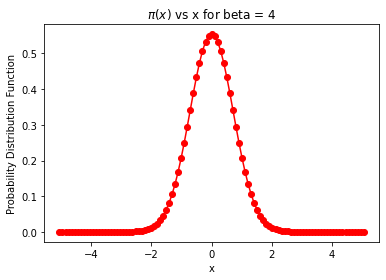

In [10]:
import math, numpy

# Free off-diagonal density matrix
def rho_free(x, xp, beta):
    return (math.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            math.sqrt(2.0 * math.pi * beta))

# Harmonic density matrix in the Trotter approximation (returns the full matrix)
def rho_harmonic_trotter(grid, beta):
    return numpy.array([[rho_free(x, xp, beta) * \
                         numpy.exp(-0.5 * beta * 0.5 * (x ** 2 + xp ** 2)) \
                         for x in grid] for xp in grid])

x_max = 5.0
nx = 100
dx = 2.0 * x_max / (nx - 1)
x = [i * dx for i in range(-(nx - 1) // 2, nx // 2 + 1)]
beta_tmp = 2.0 ** (-6)                   # initial value of beta (power of 2)
beta     = 2.0 ** 2                      # actual value of beta (power of 2)

rho = rho_harmonic_trotter(x, beta_tmp)  # density matrix at initial beta
while beta_tmp < beta:
    rho = numpy.dot(rho, rho)
    rho *= dx
    beta_tmp *= 2.0
    #print ('beta: %s -> %s' % (beta_tmp / 2.0, beta_tmp))
    Z = sum(rho[j, j] for j in range(nx + 1)) * dx
    pi_of_x = [rho[j, j] / Z for j in range(nx + 1)]
    f = open('data_harm_matrixsquaring_beta_4' + str(beta) + '.dat', 'w')
    for j in range(nx + 1):
        f.write(str(x[j]) + ' ' + str(rho[j, j] / Z) + '\n')
    f.close()
    
pylab.plot(x, pi_of_x,'-o',color = 'red')
pylab.xlabel('x')
pylab.ylabel('Probability Distribution Function')
pylab.title('$\pi(x)$ vs x for beta = 4')    
pylab.savefig('Probablity_density_beta_4.png')

**B1 (continued)**

Note that the program does matrix squaring from an initial inverse 
temperature (that is set to 2 ^-6) to the final inverse temperature 2^2 = 4. Note furthermore that there is a discretization dx, and a maximum  value of x (x_max). Vary these parameters, in order to understand, very 
roughly, what are acceptable choice for the initial temperature and for the discretization. Explain this in two sentences.

##### **B2 (Path-integral Monte Carlo algorithm for the harmonic oscillator)**

- Download the program naive_harmonic_path.py (from Lecture 5). We suggest you work in a new directory.

- Modify this program so that it generates the normed histogramof the x[0], that is the position of the path at slice 0. Do not record samples at each iteration, but wait for a fixed number of steps between one measurement and another (To wait 10 steps between records, introduce the condition if step % 10 == 0:).

- Modify this program further by inputting the matrix-squaring  data file from Section B1 and by plotting these data together with the histogram.

You may use the following function to read a two-column file into two lists:<br>

def read_file(filename):<br>
    list_x = []<br>
    list_y = []<br>
    with open(filename) as f:<br>
        for line in f:<br>
            x, y = line.split()<br>
            list_x.append(float(x))<br>
            list_y.append(float(y))<br>
    f.close()<br>
    return list_x, list_y<br>

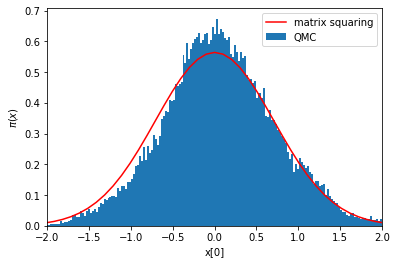

In [11]:
import math, random

def rho_free(x, x1, beta):    # free off-diagonal density matrix
    return math.exp(-(x - x1) ** 2 / (2.0 * beta)) 

beta = 4.0
N =10                                           # number of slices
dtau = beta / N
delta = 0.1                                      # maximum displacement on one slice
n_steps =1000000                                # number of Monte Carlo steps
x = [0.0] * N                                     # initial path
y_hist = []
for step in range(n_steps):
    k = random.randint(0, N - 1)                  # random slice
    knext, kprev = (k + 1) % N, (k - 1) % N       # next/previous slices
    x_new = x[k] + random.uniform(-delta, delta)  # new position at slice k
    old_weight  = (rho_free(x[knext], x[k], dtau) *
                   rho_free(x[k], x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x[k] ** 2))
    new_weight  = (rho_free(x[knext], x_new, dtau) *
                   rho_free(x_new, x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x_new ** 2))
    if random.uniform(0.0, 1.0) < new_weight / old_weight:
        x[k] = x_new
        if step%10 == 0:
            y_hist.append(x[0])

pylab.hist(y_hist, 200, density = 'True', stacked = 'True')
#Code for reading a file with (2xn) list
def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
        for line in f:
            x, y = line.split()
            list_x.append(float(x))
            list_y.append(float(y))
    f.close()
    return list_x, list_y
filename = 'data_harm_matrixsquaring_beta16.0.dat'
[list_x, list_y] = read_file(filename)
plt.plot(list_x, list_y, color = 'red')
plt.xlim(-2,2)
plt.xlabel('x[0]')
plt.ylabel('$\pi(x)$')
plt.legend(['matrix squaring', 'QMC'])
pylab.savefig('Probablity_QMC_X0.png')

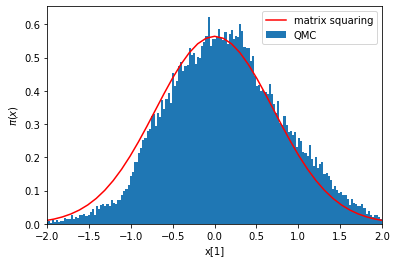

In [12]:
import math, random

def rho_free(x, x1, beta):    # free off-diagonal density matrix
    return math.exp(-(x - x1) ** 2 / (2.0 * beta)) 

beta = 4.0
N =10                                           # number of slices
dtau = beta / N
delta = 0.1                                      # maximum displacement on one slice
n_steps =1000000                                # number of Monte Carlo steps
x = [0.0] * N                                     # initial path
y_hist = []
for step in range(n_steps):
    k = random.randint(0, N - 1)                  # random slice
    knext, kprev = (k + 1) % N, (k - 1) % N       # next/previous slices
    x_new = x[k] + random.uniform(-delta, delta)  # new position at slice k
    old_weight  = (rho_free(x[knext], x[k], dtau) *
                   rho_free(x[k], x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x[k] ** 2))
    new_weight  = (rho_free(x[knext], x_new, dtau) *
                   rho_free(x_new, x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x_new ** 2))
    if random.uniform(0.0, 1.0) < new_weight / old_weight:
        x[k] = x_new
        if step%10 == 0:
            y_hist.append(x[1])

pylab.hist(y_hist, 200, density = 'True', stacked = 'True')
#Code for reading a file with (2xn) list
def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
        for line in f:
            x, y = line.split()
            list_x.append(float(x))
            list_y.append(float(y))
    f.close()
    return list_x, list_y
filename = 'data_harm_matrixsquaring_beta16.0.dat'
[list_x, list_y] = read_file(filename)
plt.plot(list_x, list_y, color = 'red')
plt.xlim(-2,2)
plt.xlabel('x[1]')
plt.ylabel('$\pi(x)$')
plt.legend(['matrix squaring', 'QMC'])
pylab.savefig('Probablity_QMC_X1.png')